Let's attempt to utilize `eeglab`, our target MATLAB toolbox using SoS

In [1]:
% Init EEGLAB
eeglab

Some menus items hidden. Use Preference menu to show them all.
eeglab: options file is C:\Users\H8801\eeg_options.m
Retrieving plugin versions from server...
Retrieving download statistics...
EEGLAB: adding "ICLabel" v1.4 (see >> help eegplugin_iclabel)
EEGLAB: adding "clean_rawdata" v2.7 (see >> help eegplugin_clean_rawdata)
EEGLAB: adding "dipfit" v4.3 (see >> help eegplugin_dipfit)
EEGLAB: adding "firfilt" v2.5.1 (see >> help eegplugin_firfilt)EEGLAB: adding "xdfimport" v1.18 (see >> help eegplugin_xdfimport)
You are using the latest version of EEGLAB.


         You may experience errors if a plugin overloads a MATLAB function
 - new version 2.6 available


Wow, that worked... Okay cool. Let's load in some example data

In [2]:
% First-line commenting does work if it doesn't detect a magic :)

% Load SynthData
EEG = pop_loadxdf('C:\Users\H8801\sos_matlab_python_examples\data\SynthData_A1.xdf' , 'streamtype', 'EEG');

% Filter the data with a 0.1 to 10 Hz fir bandpass
EEG = pop_eegfiltnew(EEG, 'locutoff',0.1,'hicutoff',10);

% Now epoch the data for class 0 and 1
ERP_0 = pop_epoch(EEG, {'0'}, [-0.5 1], 'epochinfo', 'yes');
ERP_0 = pop_rmbase(ERP_0, [-500 0] ,[]);

ERP_1 = pop_epoch(EEG, {'1'}, [-0.5 1], 'epochinfo', 'yes');
ERP_1 = pop_rmbase(ERP_1, [-500 0] ,[]);

% Extract just the data of ERP_0 and ERP_1 to a cell array for exporting
ERPs = {ERP_0.data; ERP_1.data};

% Let's also extrat time
times = ERP_0.times;

Now importing...Warning: Nominal sampling rate of stream Synthetic_Marker_Stream is 0. Calculated effective sampling rate might not be meaningful, relying on this rate is not recommended.
> In load_xdf (line 398)
In eeg_load_xdf (line 35)
In pop_loadxdf (line 110)
done.
Note for expert users: Nose direction is now set from '+Y' to default +X in EEG.chanlocs
pop_eegfiltnew() - performing 16501 point bandpass filtering.
pop_eegfiltnew() - transition band width: 0.1 Hz
pop_eegfiltnew() - passband edge(s): [0.1 10] Hz
pop_eegfiltnew() - cutoff frequency(ies) (-6 dB): [0.05 10.05] Hz
pop_eegfiltnew() - filtering the data (zero-phase, non-causal)
firfilt(): |                    |   0%=                   /   5%, ETE 00:06=                  -  10%, ETE 00:04=                 \  15%, ETE 00:03=                |  20%, ETE 00:02=      

Let's get the data into Python for plotting

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amplitude ($\\mu V$)')

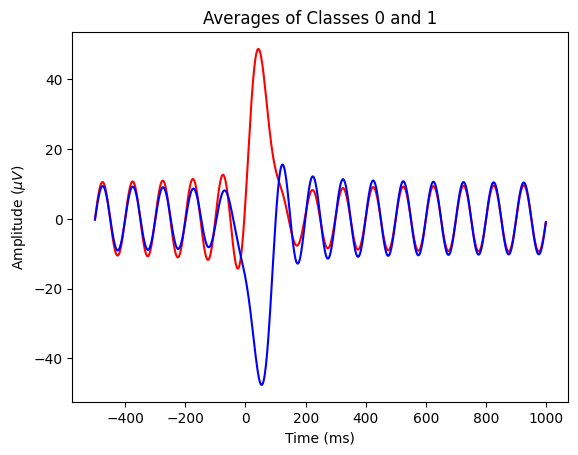

In [4]:
%get ERPs --from MATLAB
%get times --from MATLAB

# We'll break up ERPs into ERP_0 and ERP_1 again for convenience
ERP_0 = ERPs[0][0]
ERP_1 = ERPs[1][0]

# Take the average of a single channel (they're all the same)
ERP_0_avg = np.mean(ERP_0[0, :, :], 1)
ERP_1_avg = np.mean(ERP_1[0, :, :], 1)

# And let's plot those bad boys
plt.plot(times, ERP_0_avg, 'r');
plt.plot(times, ERP_1_avg, 'b');
plt.title('Averages of Classes 0 and 1');
plt.xlabel('Time (ms)');
plt.ylabel('Amplitude ($\mu V$)');